# Задание 1 (6 баллов). Определение дифференциальной экспрессии

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc
import scipy
from scipy import stats

In [2]:
!ls

GCF_000005845.2_ASM584v2_genomic.gff Untitled1.ipynb
HW5_DE_ribo_wig_analysis.ipynb       annot.txt
RiboSeq.ipynb                        annotation.txt
RiboSeq_EColi_track_f.wig            design.csv
RiboSeq_EColi_track_r.wig            fcoords.txt
RiboSeq_RNASeq_HCC_counts.tsv        rcoords.txt
Untitled.ipynb


In [3]:
df = pd.read_csv('RiboSeq_RNASeq_HCC_counts.tsv', sep='\t') 
# count matrix = STAR output
df.head()
# sample_number-tissue_type-experiment

geneID geneSymbol  LC001-normal-RPF  LC001-tumor-RPF  \
0  ENSG00000000003.14     TSPAN6                 0                0   
1   ENSG00000000005.5       TNMD                 0                0   
2  ENSG00000000419.12       DPM1               168              239   
3  ENSG00000000457.13      SCYL3                65              121   
4  ENSG00000000460.16   C1orf112                 8               43   

   LC001-normal-RNA  LC001-tumor-RNA  LC033-normal-RPF  LC033-tumor-RPF  \
0               402              873                 0                0   
1                 0                1                 0                0   
2                88              187               114              439   
3                60              106                36              163   
4                18               70                16               76   

   LC033-normal-RNA  LC033-tumor-RNA  ...  LC507-normal-RNA  LC507-tumor-RNA  \
0               301             1627  ...               218              457   
1                 0                1  ...                 0                0   
2                66              201  ...                92              170   
3                70              156  ...               127              176   
4                 4               63  ...               124              437   

   LC508-normal-RPF  LC508-tumor-RPF  LC508-normal-RNA  LC508-tumor-RNA  \
0                 0                0               200              889   
1                 1                0                 0                0   
2               109              357                60              244   
3                67              176                55              261   
4                 7              167                34              201   

   LC509-normal-RPF  LC509-tumor-RPF  LC509-normal-RNA  LC509-tumor-RNA  
0                 0                0               161            857.0  
1                 0                0                 0              NaN  
2               141              173                56             83.0  
3                64              100                68            176.0  
4                 6               61                 9             58.0  

[5 rows x 42 columns]

In [4]:
counts = df 
genes = list(counts["geneSymbol"])
del counts["geneID"], counts["geneSymbol"]
counts = counts.fillna(0)

In [5]:
counts.head()

LC001-normal-RPF  LC001-tumor-RPF  LC001-normal-RNA  LC001-tumor-RNA  \
0                 0                0               402              873   
1                 0                0                 0                1   
2               168              239                88              187   
3                65              121                60              106   
4                 8               43                18               70   

   LC033-normal-RPF  LC033-tumor-RPF  LC033-normal-RNA  LC033-tumor-RNA  \
0                 0                0               301             1627   
1                 0                0                 0                1   
2               114              439                66              201   
3                36              163                70              156   
4                16               76                 4               63   

   LC034-normal-RPF  LC034-tumor-RPF  ...  LC507-normal-RNA  LC507-tumor-RNA  \
0                 0                0  ...               218              457   
1                 0                0  ...                 0                0   
2               325              117  ...                92              170   
3               130               76  ...               127              176   
4                44               14  ...               124              437   

   LC508-normal-RPF  LC508-tumor-RPF  LC508-normal-RNA  LC508-tumor-RNA  \
0                 0                0               200              889   
1                 1                0                 0                0   
2               109              357                60              244   
3                67              176                55              261   
4                 7              167                34              201   

   LC509-normal-RPF  LC509-tumor-RPF  LC509-normal-RNA  LC509-tumor-RNA  
0                 0                0               161            857.0  
1                 0                0                 0              0.0  
2               141              173                56             83.0  
3                64              100                68            176.0  
4                 6               61                 9             58.0  

[5 rows x 40 columns]

## 1.1 (1 балл). Для каждого гена найдите коэффициент корреляции числа каунтов между экспериментами RNA-Seq и Ribo-Seq. Какую корреляцию вы выберете — Пирсона или Спирмена? Обратите внимание, что перед вами не нормированные на глубину библиотеки каунты, учтите это при анализе.


Возьмем корреляцию Спирмена, поскольку корреляция Пирсона может находить линейные тренды там, где их нет и более чувствительна к выбросам

In [6]:
crop_tissue_type = counts.rename(columns=lambda colname: colname[-3:])
# оставляю только тип эксперимента в колонке, чтобы посчитать по нему корреляцию

In [7]:
crop_tissue_type.head(2)

RPF  RPF  RNA  RNA  RPF  RPF  RNA   RNA  RPF  RPF  ...  RNA  RNA  RPF  RPF  \
0    0    0  402  873    0    0  301  1627    0    0  ...  218  457    0    0   
1    0    0    0    1    0    0    0     1    0    0  ...    0    0    1    0   

   RNA  RNA  RPF  RPF  RNA    RNA  
0  200  889    0    0  161  857.0  
1    0    0    0    0    0    0.0  

[2 rows x 40 columns]

In [8]:
tmp = pd.DataFrame()
tmp['corr'] = crop_tissue_type.apply(
    lambda row: scipy.stats.spearmanr(row['RNA'], row['RPF'])[0], 
    axis=1)

/opt/homebrew/lib/python3.10/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


In [9]:
tmp = tmp.set_axis(genes, axis='index')
tmp.sort_values(by='corr', ascending=False).head(5)

corr
TRIM60    1.0
RFPL4B    1.0
GAGE10    1.0
FAM46D    1.0
SCGB1D2   1.0

In [10]:
tmp.sort_values(by='corr').head(5)

corr
LAT      -0.599996
RPH3A    -0.588242
C14orf28 -0.587297
SOX8     -0.561372
REM2     -0.551351

## 1.2 (1 балл). Постройте гистограмму распределения этих коэффициентов корреляции. Для каких генов корреляция самая высокая, а для каких — самая низкая? Как вы можете это объяснить?

<AxesSubplot: ylabel='Count'>

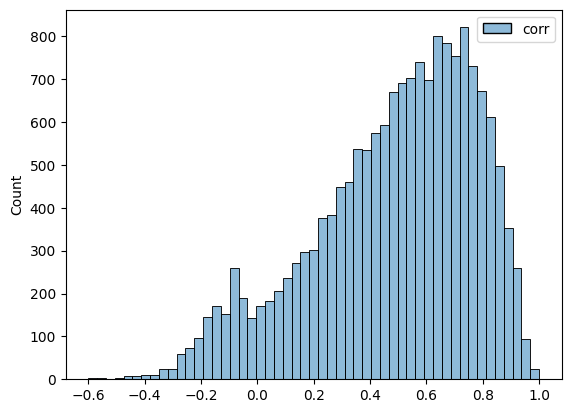

In [11]:
sns.histplot(data=tmp)

In [12]:
tail = tmp.sort_values(by='corr', ascending=False).head(5).index
top = tmp.sort_values(by='corr').head(5).index


print("Гены с наименьшей кореляцией количества каунтов в RiboSeq и scRNA-seq:", list(tail))
print("Гены с наибольшей кореляцией количества каунтов в RiboSeq и scRNA-seq:", list(top))

Гены с наименьшей кореляцией количества каунтов в RiboSeq и scRNA-seq: ['TRIM60', 'RFPL4B', 'GAGE10', 'FAM46D', 'SCGB1D2']
Гены с наибольшей кореляцией количества каунтов в RiboSeq и scRNA-seq: ['LAT', 'RPH3A', 'C14orf28', 'SOX8', 'REM2']


1. Наименьшая корреляция: у этих генов количество каунтов на рибосек меньше, чем на РНК-секвенировании. Значит, что экспрессия РНК есть, но синтеза белка с нее нет, либо он на низком уровне. Это может наблюдаться, если происходит РНК интерференция либо деградация РНК другим механизмом, в результате чего экспрессия белка с данных генов понижается. 
2. Наибольшая корреляция. В данном случае синтез белка сильно зависит от уровня экспрессии гена. Должно быть, в этом случае транскрипты могут вести себя нормально и почти не деградируют. 

#### Посмотрим, насколько корреляция рибосек-рнксек по-разному распределена между тканями: 

In [13]:
crop = df.rename(columns=lambda colname: colname[6:])
tmp1 = pd.DataFrame()
tmp1['Normal_corr'] = crop.apply(
    lambda row: scipy.stats.spearmanr(row['normal-RPF'], row['normal-RNA'])[0], 
    axis=1,
)


tmp1['Tumor_corr'] = crop.apply(
    lambda row: scipy.stats.spearmanr(row['tumor-RPF'], row['tumor-RNA'])[0], 
    axis=1,
)

/opt/homebrew/lib/python3.10/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
/opt/homebrew/lib/python3.10/site-packages/scipy/stats/_stats_py.py:4881: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


In [14]:
tmp1 = tmp1.set_axis(genes, axis='index')
tmp1.sort_values(by='Normal_corr', ascending=False).head(5)

Normal_corr  Tumor_corr
SCGB1D2          1.0         NaN
CPA5             1.0         NaN
ZNF730           1.0    0.486258
PRG3             1.0         NaN
WISP3            1.0         NaN

<AxesSubplot: ylabel='Count'>

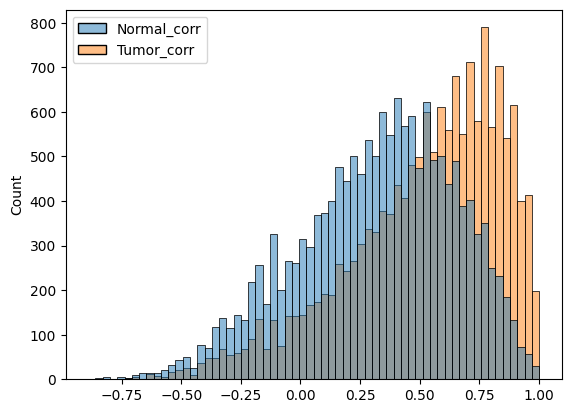

In [15]:
sns.histplot(tmp1)

### В опухолевых тканях корреляция РНКсек-Рибосек выше, чем в нормальных тканях. Это может говорить о нарушениях в даун-регуляции трансляции

In [16]:
# 5 наиболее и наименее коррелированных по риборек-рнксек каунтам генов в нормальной и опухолевой ткани
tail_norm = tmp1.sort_values(by='Normal_corr', ascending=False).head(5).index
top_norm = tmp1.sort_values(by='Normal_corr').head(5).index
tail_tumor = tmp1.sort_values(by='Tumor_corr', ascending=False).head(5).index
top_tumor = tmp1.sort_values(by='Tumor_corr').head(5).index

print("Гены с наименьшей кореляцией количества каунтов в RiboSeq и scRNA-seq в норме и раке:", list(tail_norm), list(tail_tumor))
print("Гены с наибольшей кореляцией количества каунтов в RiboSeq и scRNA-seq в норме и раке:", list(top_norm), list(top_tumor))

Гены с наименьшей кореляцией количества каунтов в RiboSeq и scRNA-seq в норме и раке: ['SCGB1D2', 'CPA5', 'ZNF730', 'PRG3', 'WISP3'] ['RFPL4B', 'CKMT2', 'TF', 'SEC14L2', 'SLC2A1']
Гены с наибольшей кореляцией количества каунтов в RiboSeq и scRNA-seq в норме и раке: ['GKAP1', 'PCSK4', 'ABCG4', 'AMY2B', 'P2RX3'] ['FAM58A', 'TRDMT1', 'THRA', 'BBOF1', 'PRDM8']


## 1.3 (1 балл). Проанализируйте распределение каунтов Ribo-seq: постройте зависимость дисперсии от среднего. Похоже ли это на NB-распределение? Если нет, то на какое похоже? Если да, то какие статистические тесты можно использовать для подтверждения того, что перед вами NB-распределение?

In [17]:
rpf = crop_tissue_type.drop(['RNA'], axis=1)
rpf.head()

RPF  RPF  RPF  RPF  RPF  RPF  RPF  RPF  RPF  RPF  RPF  RPF  RPF  RPF  RPF  \
0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
1    0    0    0    0    0    0    0    0    0    2    0    0    0    0    0   
2  168  239  114  439  325  117  106  192  118  292  159  237  149  230  169   
3   65  121   36  163  130   76   34   43   84  221   74  185   65   98   81   
4    8   43   16   76   44   14    5   27   24   42   10   71   18  103   79   

   RPF  RPF  RPF  RPF  RPF  
0    0    0    0    0    0  
1    0    1    0    0    0  
2  260  109  357  141  173  
3  105   67  176   64  100  
4  225    7  167    6   61

In [18]:
var_gene = np.var(rpf.iloc[:,2:], axis=1)
mean_gene = np.mean(rpf.iloc[:,2:], axis=1)
# каунты гена

In [19]:
mean_gene.sort_values()

0             0.000000
12549         0.000000
12560         0.000000
12568         0.000000
12571         0.000000
             ...      
5584     108110.722222
16076    147670.111111
12685    152970.333333
1618     256602.333333
10789    625308.333333
Length: 18945, dtype: float64

In [20]:
var_sample = np.var(rpf.iloc[:,2:], axis=0)
mean_sample = np.mean(rpf.iloc[:,2:], axis=0 ) 

# дисперсия количества каунтов в разных образцах

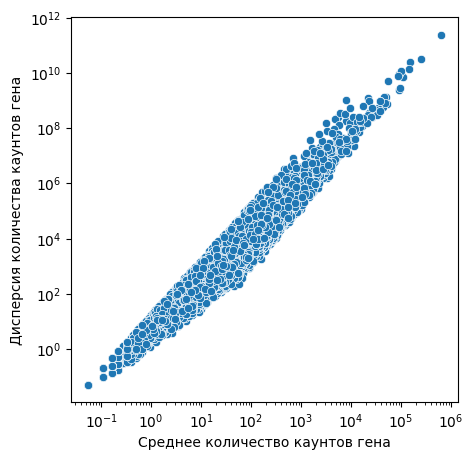

In [21]:
fig, ax = plt.subplots(figsize=(5, 5))

sns.scatterplot(x=mean_gene, y=var_gene)
ax.set_xlabel("Среднее количество каунтов гена"); ax.set_ylabel("Дисперсия количества каунтов гена")

ax.set_xscale("log"); ax.set_yscale("log")

The mean and variance of a negative binomial distribution are n(1-p)/p and n(1-p)p^2 -> по их зависимости распределение похоже на NB

### Чтобы проверить, порождены ли данные NB распределением, можно воспользоваться хи-квадратом или тестом Колмогорова-Смирнова.



In [22]:
from scipy.stats import kstest
import statsmodels.api as sm

In [23]:
rpf = crop_tissue_type.drop(['RNA'], axis=1)
rpf.head(2)

RPF  RPF  RPF  RPF  RPF  RPF  RPF  RPF  RPF  RPF  RPF  RPF  RPF  RPF  RPF  \
0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   
1    0    0    0    0    0    0    0    0    0    2    0    0    0    0    0   

   RPF  RPF  RPF  RPF  RPF  
0    0    0    0    0    0  
1    0    1    0    0    0

пытаюсь оценить  параметры  распределения каунтов на ген в рибосеке) 

In [24]:
genecounts= pd.DataFrame()
genecounts['counts'] = rpf.sum(axis=1) 

s = np.random.negative_binomial(10, 0.1, 18945)
X = np.ones_like(genecounts['counts']) # t fit the negative binomial probability mass function to our sample using the negative binomial regression framework
res = sm.NegativeBinomial(genecounts['counts'], X).fit(start_params=[1,1])
print(res.summary())

Optimization terminated successfully.
         Current function value: 8.149744
         Iterations: 23
         Function evaluations: 25
         Gradient evaluations: 25
                     NegativeBinomial Regression Results                      
Dep. Variable:                 counts   No. Observations:                18945
Model:               NegativeBinomial   Df Residuals:                    18944
Method:                           MLE   Df Model:                            0
Date:                Thu, 08 Dec 2022   Pseudo R-squ.:               1.777e-11
Time:                        21:59:36   Log-Likelihood:            -1.5440e+05
converged:                       True   LL-Null:                   -1.5440e+05
Covariance Type:            nonrobust   LLR p-value:                       nan
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.7442      0.016    54

In [25]:
mu = np.exp(res.params[0])
p = 1/(1+np.exp(res.params[0])*res.params[1])
n = np.exp(res.params[0])*p/(1-p)

mu,p,n

(6274.192296560083, 3.254178577508328e-05, 0.20418006601030364)

In [26]:
rv = stats.nbinom.rvs(0.20418006601030364, 3.254178577508328e-05, size=18945)
scipy.stats.kstest(genecounts['counts'].values, rv)

KstestResult(statistic=0.1270519926101874, pvalue=9.555862888973198e-134)

p-value меньше 0,05, тогда распределение NB?? )) 
мне кажется это делается не так... )) )) 

## 1.4 (3 балла). Найдите дифференциально экспрессированные гены по RNA-Seq между нормой и опухолью. Постройте volcano plot. То же самое сделайте и для Ribo-Seq эксперимента. Совпадают ли результаты дифференциальной экспрессии? Какие гены оказались значимо различны по экспрессии в одном случае, а какие — в другом? 

In [27]:
import rpy2.robjects as ro
from rpy2.robjects.packages import importr
from rpy2.robjects import pandas2ri
from rpy2.robjects.conversion import localconverter

During startup - Warning messages:
1: Setting LC_COLLATE failed, using "C" 
2: Setting LC_TIME failed, using "C" 
3: Setting LC_MESSAGES failed, using "C" 
4: Setting LC_MONETARY failed, using "C" 


In [28]:
pandas2ri.activate()

In [29]:
DESeq2 = importr("DESeq2")

In [30]:
counts.head()

LC001-normal-RPF  LC001-tumor-RPF  LC001-normal-RNA  LC001-tumor-RNA  \
0                 0                0               402              873   
1                 0                0                 0                1   
2               168              239                88              187   
3                65              121                60              106   
4                 8               43                18               70   

   LC033-normal-RPF  LC033-tumor-RPF  LC033-normal-RNA  LC033-tumor-RNA  \
0                 0                0               301             1627   
1                 0                0                 0                1   
2               114              439                66              201   
3                36              163                70              156   
4                16               76                 4               63   

   LC034-normal-RPF  LC034-tumor-RPF  ...  LC507-normal-RNA  LC507-tumor-RNA  \
0                 0                0  ...               218              457   
1                 0                0  ...                 0                0   
2               325              117  ...                92              170   
3               130               76  ...               127              176   
4                44               14  ...               124              437   

   LC508-normal-RPF  LC508-tumor-RPF  LC508-normal-RNA  LC508-tumor-RNA  \
0                 0                0               200              889   
1                 1                0                 0                0   
2               109              357                60              244   
3                67              176                55              261   
4                 7              167                34              201   

   LC509-normal-RPF  LC509-tumor-RPF  LC509-normal-RNA  LC509-tumor-RNA  
0                 0                0               161            857.0  
1                 0                0                 0              0.0  
2               141              173                56             83.0  
3                64              100                68            176.0  
4                 6               61                 9             58.0  

[5 rows x 40 columns]

In [31]:
design = pd.DataFrame({
    "condition": [sample_name.split("-")[1] for sample_name in counts.columns],
    "experiment": [sample_name.split("-")[2] for sample_name in counts.columns],
}, index=counts.columns)

design.head()

condition experiment
LC001-normal-RPF    normal        RPF
LC001-tumor-RPF      tumor        RPF
LC001-normal-RNA    normal        RNA
LC001-tumor-RNA      tumor        RNA
LC033-normal-RPF    normal        RPF

## Дифференциально экспрессированные гены между нормой и опухолью для RPF и RNA-seq

In [32]:
df = pd.read_csv("RiboSeq_RNASeq_HCC_counts.tsv", sep='\t', index_col=0).iloc[:, 1:]

def prepare_counts(df: pd.DataFrame, normal: str, tumor: str):
    indexes = df.columns.str.split("-", 1).str[1]
    counts = df.T[(indexes == normal) | (indexes == tumor)].T
    meta = pd.DataFrame({"Tissue": counts.columns.str.split("-", 2).str[1]}, index=counts.columns)
    return counts, meta

In [33]:
countsRNA, metaRNA = prepare_counts(df, 'normal-RNA', 'tumor-RNA')
countsRPF, metaRPF = prepare_counts(df, 'normal-RPF', 'tumor-RPF')

/var/folders/7h/_mrm1yh5299bvqql6k199xb00000gn/T/ipykernel_96706/2721725084.py:4: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  indexes = df.columns.str.split("-", 1).str[1]
/var/folders/7h/_mrm1yh5299bvqql6k199xb00000gn/T/ipykernel_96706/2721725084.py:6: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  meta = pd.DataFrame({"Tissue": counts.columns.str.split("-", 2).str[1]}, index=counts.columns)
/var/folders/7h/_mrm1yh5299bvqql6k199xb00000gn/T/ipykernel_96706/2721725084.py:4: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  indexes = df.columns.str.split("-", 1).str[1]
/var/folders/7h/_mrm1yh5299bvqql6k199xb00000gn/T/ipykernel_96706/2721725084.py:6: FutureWarning: In a future version of pandas all arguments of StringMethods.s

In [34]:
metaRNA.head(3)

Tissue
LC001-normal-RNA  normal
LC001-tumor-RNA    tumor
LC033-normal-RNA  normal

In [35]:
metaRPF.head(3)

Tissue
LC001-normal-RPF  normal
LC001-tumor-RPF    tumor
LC033-normal-RPF  normal

In [36]:
from rpy2.robjects import default_converter

In [37]:
from rpy2.robjects.conversion import rpy2py

In [38]:
base = importr("base")

In [39]:
def deseq(meta: pd.DataFrame, counts: pd.DataFrame, formula: str, ref: str, exp: str):
    # Calculate normalization factors
    dds = DESeq2.DESeqDataSetFromMatrix(
        countData=counts, colData=meta, design=ro.Formula(formula))
    dds = DESeq2.DESeq(dds)
    print(f"Tissue_{ref}_vs_{exp}")
    resR = DESeq2.results(dds, name=f"Tissue_{exp}_vs_{ref}")
    res = r_to_df(resR)
    res = res.sort_values("padj")
    res = res.loc[res["padj"] < 0.05]
    res = res.loc[res["log2FoldChange"].abs() > 0.5]

    return res

In [40]:
def r_to_df(r_df):
    with localconverter(default_converter + pandas2ri.converter):
        return rpy2py(base.as_data_frame(r_df))

In [41]:
result_tissue_RPF = deseq(meta=metaRPF, counts=countsRPF, formula="~ Tissue", ref="normal", exp="tumor")
result_tissue_RPF

R[write to console]: converting counts to integer mode

R[write to console]: estimating size factors

R[write to console]: estimating dispersions

R[write to console]: gene-wise dispersion estimates

R[write to console]: mean-dispersion relationship

R[write to console]: final dispersion estimates

R[write to console]: fitting model and testing

R[write to console]: -- replacing outliers and refitting for 888 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

R[write to console]: estimating dispersions

R[write to console]: fitting model and testing



Tissue_normal_vs_tumor


baseMean  log2FoldChange     lfcSE       stat  \
ENSG00000087237.10  234.706196       -3.661168  0.328144 -11.157205   
ENSG00000138315.12  378.527099       -4.123941  0.384101 -10.736618   
ENSG00000145850.8   115.823325       -4.410428  0.424721 -10.384291   
ENSG00000152990.13  351.272069       -3.789142  0.368147 -10.292473   
ENSG00000104938.16   60.025648       -6.019149  0.589470 -10.211112   
...                        ...             ...       ...        ...   
ENSG00000125398.5    63.848284        1.603262  0.613808   2.611991   
ENSG00000007520.3    40.195427        1.102950  0.422365   2.611366   
ENSG00000146083.11   23.597993        0.936732  0.358719   2.611323   
ENSG00000136720.6    13.879786        1.542853  0.590946   2.610818   
ENSG00000174456.13    7.195521        1.849924  0.708937   2.609434   

                          pvalue          padj  
ENSG00000087237.10  6.603531e-29  9.219850e-25  
ENSG00000138315.12  6.850819e-27  4.782557e-23  
ENSG00000145850.8   2.923339e-25  1.360522e-21  
ENSG00000152990.13  7.619383e-25  2.659546e-21  
ENSG00000104938.16  1.768264e-24  4.937702e-21  
...                          ...           ...  
ENSG00000125398.5   9.001665e-03  4.950030e-02  
ENSG00000007520.3   9.018143e-03  4.955810e-02  
ENSG00000146083.11  9.019276e-03  4.955810e-02  
ENSG00000136720.6   9.032600e-03  4.961179e-02  
ENSG00000174456.13  9.069213e-03  4.979330e-02  

[2537 rows x 6 columns]

In [42]:
countsRNA = countsRNA.fillna(0)

In [43]:
result_tissue_RNA = deseq(meta=metaRNA, counts=countsRNA, formula="~ Tissue", ref="normal", exp="tumor")

R[write to console]: converting counts to integer mode

R[write to console]: estimating size factors

R[write to console]: estimating dispersions

R[write to console]: gene-wise dispersion estimates

R[write to console]: mean-dispersion relationship

R[write to console]: final dispersion estimates

R[write to console]: fitting model and testing

R[write to console]: -- replacing outliers and refitting for 1242 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

R[write to console]: estimating dispersions

R[write to console]: fitting model and testing



Tissue_normal_vs_tumor


In [44]:
result_tissue_RNA 

baseMean  log2FoldChange     lfcSE       stat  \
ENSG00000182566.12  187.902511       -6.224294  0.471543 -13.199842   
ENSG00000138315.12  207.433311       -4.190143  0.372389 -11.252055   
ENSG00000166148.3   216.785200       -4.836026  0.444956 -10.868551   
ENSG00000129965.13  517.466267       -5.941896  0.547969 -10.843493   
ENSG00000160339.15  154.170314       -5.700993  0.527201 -10.813696   
...                        ...             ...       ...        ...   
ENSG00000169967.16  660.496332        0.578099  0.236151   2.448002   
ENSG00000121851.12   59.557501        0.787089  0.321539   2.447881   
ENSG00000007923.15  173.665221       -0.529500  0.216320  -2.447766   
ENSG00000087116.13  251.357777       -1.213785  0.496091  -2.446698   
ENSG00000108423.14   31.673315        0.873637  0.357166   2.446028   

                          pvalue          padj  
ENSG00000182566.12  8.791966e-40  1.464478e-35  
ENSG00000138315.12  2.262593e-29  1.884400e-25  
ENSG00000166148.3   1.627649e-27  8.917125e-24  
ENSG00000129965.13  2.141352e-27  8.917125e-24  
ENSG00000160339.15  2.964778e-27  9.876861e-24  
...                          ...           ...  
ENSG00000169967.16  1.436510e-02  4.977731e-02  
ENSG00000121851.12  1.436990e-02  4.978358e-02  
ENSG00000007923.15  1.437450e-02  4.978915e-02  
ENSG00000087116.13  1.441717e-02  4.992658e-02  
ENSG00000108423.14  1.444398e-02  4.999863e-02  

[4766 rows x 6 columns]

In [45]:
# Наиболее вариабельно транскрибированные и транслированные гены: 
    
top_rna = result_tissue_RNA.index[:5]
top_rpf = result_tissue_RPF.index[:5]

print('Наиболее вариабельно транскрибированные гены: ', list(top_rna))

print('Наиболее вариабельно транслированные гены: ', list(top_rpf))

Наиболее вариабельно транскрибированные гены:  ['ENSG00000182566.12', 'ENSG00000138315.12', 'ENSG00000166148.3', 'ENSG00000129965.13', 'ENSG00000160339.15']
Наиболее вариабельно транслированные гены:  ['ENSG00000087237.10', 'ENSG00000138315.12', 'ENSG00000145850.8', 'ENSG00000152990.13', 'ENSG00000104938.16']


Наиболее вариабельно транскрибированные гены: 

    1) C-type lectin domain family 4 member G
    2) phospholipase A2 group XIIB 
    3) arginine vasopressin receptor 1A 
    4) tyrosine hydroxylase 
    5) ficolin (May function in innate immunity through activation of the lectin complement pathway. Calcium dependent and GlcNAc-binding lectin. Enhances phagocytosis of S.typhimurium by neutrophils, suggesting an opsonic effect via the collagen region. show less)


Гены отвечают в основном за метаболические процессы, даунрегулированы. Можно предположить, что в опухолевых тканях снижается транскрипция белков, необходимых для метаболизма. 


Наиболее вариабельно транслированные гены: 
    
    1) Cholesteryl ester transfer protein	
    2) Oncoprotein induced transcript 3 (This gene was identified due to its downregulation in hepatocarcinomas. The encoded protein may be involved in liver development and function. )
    3) T cell immunoglobulin and mucin domain containing 4 (играет роль в фагоцитозе апоптотических клеток. promotes autophagy process by suppressing NLRP3 inflammasome activity via activation of LKB1/PRKAA1 pathway in a phosphatidylserine-dependent mechanism)
    4) adhesion G protein-coupled receptor A3 
    5) C-type lectin domain family 4 member M
    
    
    
В случае трансляции дифференциально транскрибировано больше генов, отвечающих за адгезию: CLEC4M, адгезин. Может быть, опухоль метастазирующая и эти гены сильно даунрегулированы, за счет чего может облегчаться метастазирование. Можно предположить, что в патогенезе эти белки давятся на уровне трансляции (например, за счет разрушения транскриптов в результате РНК-интерференции).

In [46]:
import plotly.graph_objects as go
import plotly.express as px


In [47]:
df['negative_log_pval_6h'] = np.log10(result_tissue_RNA['padj']) * (-1)


In [48]:
fig = go.Figure()


trace1 = go.Scatter(
 x=result_tissue_RNA['log2FoldChange'],
 y=np.log10(result_tissue_RNA['padj']) * (-1),
 mode='markers',
 hovertext=list(df.index)
)

fig.add_trace(trace1)

fig.update_layout(
    title="Volcano plot RNA",
    xaxis_title="LogFC",
    yaxis_title="Neg -10 padj",

)


fig.show()

In [49]:
fig = go.Figure()

trace1 = go.Scatter(
 x=result_tissue_RPF['log2FoldChange'],
 y=np.log10(result_tissue_RPF['padj']) * (-1),
 mode='markers',
 hovertext=list(df.index)
)

fig.add_trace(trace1)

fig.update_layout(
    title="Volcano plot RPF",
    xaxis_title="LogFC",
    yaxis_title="Neg -10 padj",

)

fig.show()

## Проведите похожий анализ, только с поиском генов с разницей в эффективности трансляции (~ method + condition + method:condition). Что вы скажете о наборе генов, который вы получили этим методом? Выводы подкрепите графиками.

In [50]:
with localconverter(ro.pandas2ri.converter):
    countData = pandas2ri.py2rpy(counts.astype(int))
    colData = pandas2ri.py2rpy(design)

In [51]:
dds = DESeq2.DESeqDataSetFromMatrix(
    countData=countData,
    colData=colData,
    design=ro.Formula("~ condition + experiment + experiment:condition"),
)

dds = DESeq2.DESeq(dds)


to_dataframe = ro.r("function(x) data.frame(x)")
dds_results = to_dataframe(DESeq2.results(dds, name="conditiontumor.experimentRPF"))

with localconverter(pandas2ri.converter):
    dds_results = ro.conversion.rpy2py(dds_results)
    dds_results.index = genes
    
dds_results

R[write to console]: estimating size factors

R[write to console]: estimating dispersions

R[write to console]: gene-wise dispersion estimates

R[write to console]: mean-dispersion relationship

R[write to console]: final dispersion estimates

R[write to console]: fitting model and testing

R[write to console]: -- replacing outliers and refitting for 783 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

R[write to console]: estimating dispersions

R[write to console]: fitting model and testing



baseMean  log2FoldChange     lfcSE      stat    pvalue  \
TSPAN6          157.314698       -1.708536  1.071524 -1.594493  0.110826   
TNMD              0.185139        0.305798  5.912838  0.051718  0.958754   
DPM1            157.609670       -0.664381  0.348364 -1.907145  0.056502   
SCYL3            96.555209       -0.180154  0.316026 -0.570059  0.568638   
C1orf112         50.909678       -0.088034  0.736560 -0.119521  0.904863   
...                    ...             ...       ...       ...       ...   
RP1-34B20.21      4.060544       -3.660062  1.640161 -2.231526  0.025646   
RP11-511P7.5     17.658822        2.975326  1.040298  2.860070  0.004235   
KLF18             0.253832        2.284850  5.894346  0.387634  0.698287   
TRBV6-2           0.644714        1.430520  5.881852  0.243209  0.807843   
RP11-736N17.11    0.734623       -1.673993  3.477345 -0.481400  0.630232   

                    padj  
TSPAN6          0.609760  
TNMD                 NaN  
DPM1            0.489304  
SCYL3           0.915436  
C1orf112        0.985700  
...                  ...  
RP1-34B20.21    0.397689  
RP11-511P7.5    0.228113  
KLF18                NaN  
TRBV6-2         0.970499  
RP11-736N17.11  0.931667  

[18945 rows x 6 columns]

/opt/homebrew/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning:

invalid value encountered in log10



Text(0, 0.5, 'log$_{10}$FDR')

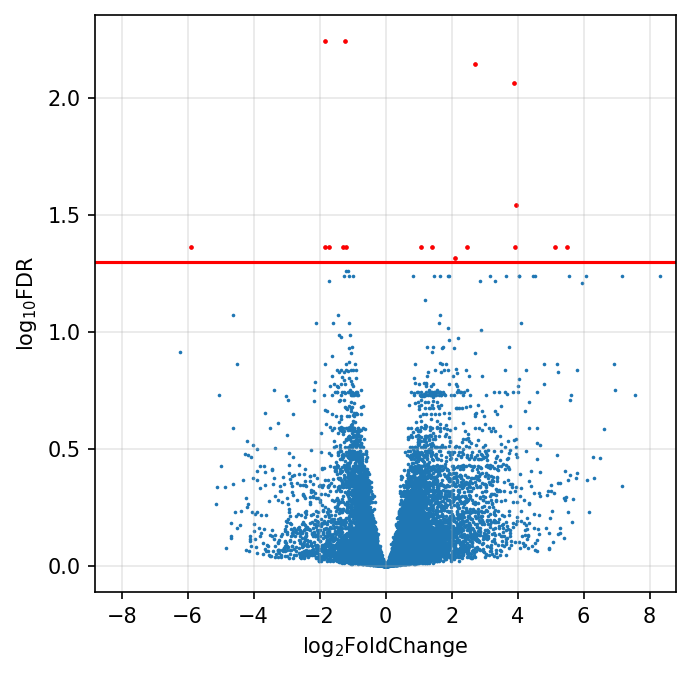

In [52]:
p_tr = 0.05

fig, ax = plt.subplots(figsize=(5, 5), dpi=150)
xlim = max(-min(dds_results.log2FoldChange), (max(dds_results.log2FoldChange))) + 0.5

sns.scatterplot(
    x=dds_results.log2FoldChange,
    y=-np.log10(dds_results.padj),
    ax=ax,
    s=3,
    linewidth=0,
)

ax.plot(
    [-xlim, xlim],
    [-np.log10(p_tr), -np.log10(p_tr)],
    color="red",
)

sns.scatterplot(
    x=dds_results[dds_results.padj < p_tr].log2FoldChange,
    y=-np.log10(dds_results[dds_results.padj < p_tr].padj),
    ax=ax,
    s=5,
    linewidth=0,
    color="red",
)

ax.grid(alpha=0.3)

ax.set_xlim(-xlim, xlim)
ax.set_xlabel("log$_2$FoldChange")
ax.set_ylabel("log$_{10}$FDR")

In [53]:
dds = DESeq2.DESeq(dds)

R[write to console]: using pre-existing size factors

R[write to console]: estimating dispersions

R[write to console]: found already estimated dispersions, replacing these

R[write to console]: gene-wise dispersion estimates

R[write to console]: mean-dispersion relationship

R[write to console]: final dispersion estimates

R[write to console]: fitting model and testing

R[write to console]: -- replacing outliers and refitting for 783 genes
-- DESeq argument 'minReplicatesForReplace' = 7 
-- original counts are preserved in counts(dds)

R[write to console]: estimating dispersions

R[write to console]: fitting model and testing



In [54]:
dds_results

baseMean  log2FoldChange     lfcSE      stat    pvalue  \
TSPAN6          157.314698       -1.708536  1.071524 -1.594493  0.110826   
TNMD              0.185139        0.305798  5.912838  0.051718  0.958754   
DPM1            157.609670       -0.664381  0.348364 -1.907145  0.056502   
SCYL3            96.555209       -0.180154  0.316026 -0.570059  0.568638   
C1orf112         50.909678       -0.088034  0.736560 -0.119521  0.904863   
...                    ...             ...       ...       ...       ...   
RP1-34B20.21      4.060544       -3.660062  1.640161 -2.231526  0.025646   
RP11-511P7.5     17.658822        2.975326  1.040298  2.860070  0.004235   
KLF18             0.253832        2.284850  5.894346  0.387634  0.698287   
TRBV6-2           0.644714        1.430520  5.881852  0.243209  0.807843   
RP11-736N17.11    0.734623       -1.673993  3.477345 -0.481400  0.630232   

                    padj  
TSPAN6          0.609760  
TNMD                 NaN  
DPM1            0.489304  
SCYL3           0.915436  
C1orf112        0.985700  
...                  ...  
RP1-34B20.21    0.397689  
RP11-511P7.5    0.228113  
KLF18                NaN  
TRBV6-2         0.970499  
RP11-736N17.11  0.931667  

[18945 rows x 6 columns]

In [55]:
to_dataframe = ro.r("function(x) data.frame(x)")
dds_results = to_dataframe(DESeq2.results(dds, name="conditiontumor.experimentRPF"))

with localconverter(pandas2ri.converter):
    dds_results = ro.conversion.rpy2py(dds_results)
    dds_results.index = genes

In [56]:
# Getting normilized counts
BiocGenerics = importr("BiocGenerics")
TMM_counts = np.array(BiocGenerics.counts(dds, normalized=True))
TMM_counts = pd.DataFrame(TMM_counts, index=genes, columns=counts.columns)

TMM_counts

LC001-normal-RPF  LC001-tumor-RPF  LC001-normal-RNA  \
TSPAN6                  0.000000         0.000000        401.989551   
TNMD                    0.000000         0.000000          0.000000   
DPM1                  297.571437       262.973441         87.997713   
SCYL3                 115.131806       133.137181         59.998440   
C1orf112               14.170068        47.313213         17.999532   
...                          ...              ...               ...   
RP1-34B20.21            0.000000         0.000000          0.999974   
RP11-511P7.5            0.000000         4.401229         26.999298   
KLF18                   0.000000         0.000000          0.000000   
TRBV6-2                 0.000000         9.902766          0.000000   
RP11-736N17.11          0.000000         4.401229          0.000000   

                LC001-tumor-RNA  LC033-normal-RPF  LC033-tumor-RPF  \
TSPAN6               800.844704          0.000000         0.000000   
TNMD                   0.917348          0.000000         0.000000   
DPM1                 171.544055        193.124283       276.417349   
SCYL3                 97.238876         60.986616       102.633321   
C1orf112              64.214352         27.105163        47.853573   
...                         ...               ...              ...   
RP1-34B20.21          35.776568          0.000000         0.000000   
RP11-511P7.5           4.586739          0.000000        20.148873   
KLF18                  0.000000          0.000000         0.000000   
TRBV6-2                0.000000          0.000000         0.000000   
RP11-736N17.11        11.925523          0.000000         0.000000   

                LC033-normal-RNA  LC033-tumor-RNA  LC034-normal-RPF  \
TSPAN6                305.614070      1119.129430          0.000000   
TNMD                    0.000000         0.687848          0.000000   
DPM1                   67.011723       138.257539        229.924930   
SCYL3                  71.073039       107.304358         91.969972   
C1orf112                4.061317        43.334452         31.128298   
...                          ...              ...               ...   
RP1-34B20.21            0.000000         3.439242          0.000000   
RP11-511P7.5           20.306583        35.080271          0.000000   
KLF18                  10.153291         0.000000          0.000000   
TRBV6-2                 0.000000         0.000000          0.000000   
RP11-736N17.11          0.000000         0.000000          0.000000   

                LC034-tumor-RPF  ...  LC507-normal-RNA  LC507-tumor-RNA  \
TSPAN6                 0.000000  ...        131.920743       261.949662   
TNMD                   0.000000  ...          0.000000         0.000000   
DPM1                 123.546117  ...         55.672974        97.442981   
SCYL3                 80.252179  ...         76.852910       100.882145   
C1orf112              14.783296  ...         75.037487       250.485782   
...                         ...  ...               ...              ...   
RP1-34B20.21           0.000000  ...          0.000000        17.769014   
RP11-511P7.5           6.335698  ...         49.016423        29.806088   
KLF18                  0.000000  ...          0.000000         0.000000   
TRBV6-2                7.391648  ...          0.000000         0.000000   
RP11-736N17.11         0.000000  ...          0.000000         0.000000   

                LC508-normal-RPF  LC508-tumor-RPF  LC508-normal-RNA  \
TSPAN6                  0.000000         0.000000        189.331946   
TNMD                    2.064160         0.000000          0.000000   
DPM1                  224.993457       231.629748         56.799584   
SCYL3                 138.298730       114.192817         52.066285   
C1orf112               14.449121       108.353412         32.186431   
...                          ...              ...               ...   
RP1-34B20.21            0.000000         3.892937          0.000000   


# Задание 2 (4 балла). Анализ wig-файла

## 2.1 (2 балла). Присутствует ли в покрытии генома неравномерность? Рассмотрите неравномерность покрытия на примере любого выбранного вами гена. Что вы можете сказать про эту неравномерность? Присутствует ли там периодичность в три нуклеотида? А если взять среднее по большому количеству генов (взяв за точку отсчёта старт-кодон)? Выводы проиллюстрируйте графиками.

In [57]:
! cat RiboSeq_EColi_track_f.wig > fcoords.txt
! cat RiboSeq_EColi_track_r.wig > rcoords.txt

! head fcoords.txt

variableStep chrom=U00096.3
40	1
77	2
85	1
139	1
147	1
153	1
155	1
159	1
173	1


In [58]:
f_coords = pd.read_csv('fcoords.txt', sep='\t')
r_coords = pd.read_csv('rcoords.txt', sep='\t')

In [59]:
! cat GCF_000005845.2_ASM584v2_genomic.gff > annotation.txt

In [60]:
! awk 'NR>7' annotation.txt  > annot.txt # обрезаю шапку файла

In [61]:
! head -n2 annot.txt

NC_000913.3	RefSeq	region	1	4641652	.	+	.	ID=NC_000913.3:1..4641652;Dbxref=taxon:511145;Is_circular=true;Name=ANONYMOUS;gbkey=Src;genome=chromosome;mol_type=genomic DNA;strain=K-12;substrain=MG1655
NC_000913.3	RefSeq	gene	190	255	.	+	.	ID=gene-b0001;Dbxref=ASAP:ABE-0000006,ECOCYC:EG11277,GeneID:944742;Name=thrL;gbkey=Gene;gene=thrL;gene_biotype=protein_coding;gene_synonym=ECK0001;locus_tag=b0001


In [62]:
annotation = pd.read_csv('annot.txt', sep='\t')

# header=None

In [63]:
annotation = annotation[annotation['region']=='gene'] # выбираю ген, они идентичны CDS 

In [64]:
annotation.head(2)

NC_000913.3  RefSeq region      1  4641652  .  + ..1  \
0  NC_000913.3  RefSeq   gene  190.0    255.0  .  +   .   
2  NC_000913.3  RefSeq   gene  337.0   2799.0  .  +   .   

  ID=NC_000913.3:1..4641652;Dbxref=taxon:511145;Is_circular=true;Name=ANONYMOUS;gbkey=Src;genome=chromosome;mol_type=genomic DNA;strain=K-12;substrain=MG1655  
0  ID=gene-b0001;Dbxref=ASAP:ABE-0000006,ECOCYC:E...                                                                                                           
2  ID=gene-b0002;Dbxref=ASAP:ABE-0000008,ECOCYC:E...

In [65]:
df = pd.DataFrame()
df['start'] = annotation['1']
df['end'] = annotation['4641652']
df.head()
# дф с координатами начала и конца генов

start     end
0   190.0   255.0
2   337.0  2799.0
4  2801.0  3733.0
6  3734.0  5020.0
8  5234.0  5530.0

In [66]:
df.shape[0] # количество генов 

4494

In [67]:
f_coords = f_coords.reset_index()
r_coords = r_coords.reset_index()

In [68]:
f_coords.head(2)

index  variableStep chrom=U00096.3
0     40                            1
1     77                            2

In [69]:
r_coords.columns = ['start_coord', 'counts']

In [70]:
f_coords.columns = ['start_coord', 'counts']
f_coords.head(2)

start_coord  counts
0           40       1
1           77       2

In [71]:
coords = pd.concat([r_coords, f_coords], axis=0) 
coords

start_coord  counts
0               585       1
1              1212       1
2              1292       1
3              3626       1
4              3979       1
...             ...     ...
621390      4641624       3
621391      4641625       1
621392      4641626       1
621393      4641634       1
621394      4641668       1

[1264740 rows x 2 columns]

In [72]:
gene1 = coords[coords['start_coord'].between(df['start'][0], df['end'][0])] 
# риды, относящиеся к первому гену

In [73]:
gene1.head()

start_coord  counts
17          191      21
18          192       4
19          193       3
20          194      25
21          195       6

<AxesSubplot: xlabel='start_coord', ylabel='counts'>

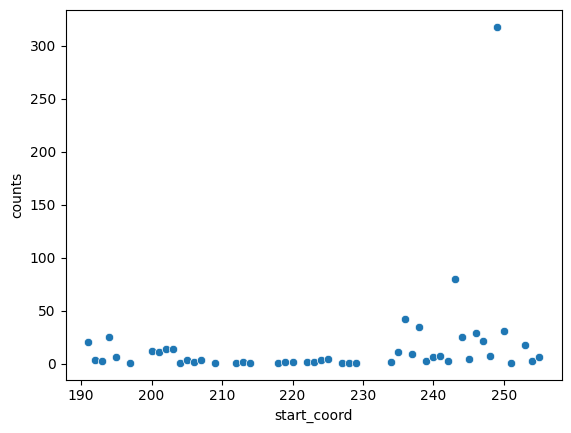

In [74]:
sns.scatterplot(gene1, x=gene1['start_coord'], y='counts')

#### frames - словарь, где ключ - ген, а значение - дф с ридами, которые попадают на него

In [75]:
frames = {}

groups = df.index
for grp in groups:
    #do some calcs to get a dataframe called 'df'
    frames[grp] = coords[coords['start_coord'].between(df['start'][grp], df['end'][grp])] 
    

In [76]:
len(frames)

4494

In [77]:
frames[0].head()

start_coord  counts
17          191      21
18          192       4
19          193       3
20          194      25
21          195       6

## 2.2 (1 балл). Рассчитайте значения RPKM и TPM для каждого гена. В чём разница между RPKM и TPM?

Разница в порядке нормирования. В РПКМ мы сначала нормируем на риды на миллион п.о, затем на длину гена. В ТПМ сначала нормируем каунты на длину гена, затем риды на 1000 п.о. нормируем на общую сумму этих ридов на 1000 п.о, потом на миллион оснований. 

In [78]:
df.head() # координаты старт-стоп

start     end
0   190.0   255.0
2   337.0  2799.0
4  2801.0  3733.0
6  3734.0  5020.0
8  5234.0  5530.0

In [79]:
reads = len(annotation)
cols = {'coordinate': [0] * reads,
        'counts': [0] * reads,
        'gene_length': [0] * reads,
        'A': [0] * reads,
        'TPM': [0] * reads,
        'TPM': [0] * reads,
        'RPKM':[0]*reads}


counts_df = pd.DataFrame(cols)

In [80]:
# df - старт и стоп для ридов
# таблица с координатами генов, средним кол-вом ридов, длинами
for i in counts_df.index:
    
  gene_counts = coords[(coords['start_coord'].between(df.iloc[i, 0], df.iloc[i, 1]))]   # риды между началом и концом гена
    
  counts_df.loc[i, 'counts'] = gene_counts['counts'].sum() # сумма каунтов на гене  
  counts_df.loc[i, 'coordinate'] = df.iloc[i, 0]
  counts_df.loc[i, 'gene_length'] =  df.iloc[i, 1] - df.iloc[i, 0] + 1
    
# расчет TPM    
# Normalize for gene length
for i in range(counts_df.shape[0]):
    counts_df.loc[i, 'A'] = counts_df.loc[i,'counts']*10**3/counts_df.loc[i, 'gene_length']

# Normalize for sequencing depth (divide by total RPK)

for i in range(counts_df.shape[0]):
    counts_df.loc[i, 'TPM'] = counts_df.loc[i, 'A']*10**6/counts_df['A'].sum()    

    
# расчет RPKM    

totalcounts = counts_df['counts'].sum()

for i in counts_df.index:

    length =  counts_df.loc[i, 'gene_length']
    counts = counts_df.loc[i, 'counts']
    
    counts_df.loc[i, 'RPKM'] = counts*10**9/(length*totalcounts)
    

# Расчет TPM исходя из того, что TPM = RPKM*10**6 / sum(RPKM) 
for i in counts_df.index:

    counts_df.loc[i,'TPM_2'] = counts_df['RPKM'][i]*10**6/counts_df['RPKM'].sum()     
    
counts_df    

coordinate  counts  gene_length             A         TPM        RPKM  \
0            190     811           66  12287.878788  126.253658  208.081132   
1            337   34301         2463  13926.512383  143.090045  235.829513   
2           2801    6706          933   7187.566988   73.849737  121.713202   
3           3734   19619         1287  15243.978244  156.626546  258.139286   
4           5234     160          297    538.720539    5.535165    9.122614   
...          ...     ...          ...           ...         ...         ...   
4489     4638178      30         1353     22.172949    0.227819    0.375473   
4490     4639590   11509          717  16051.603905  164.924617  271.815500   
4491     4640402      66          141    468.085106    4.809411    7.926484   
4492     4640718      99           54   1833.333333   18.836859   31.045397   
4493     4640942     561          687    816.593886    8.390217   13.828081   

           TPM_2  
0     126.253658  
1     143.090045  
2      73.849737  
3     156.626546  
4       5.535165  
...          ...  
4489    0.227819  
4490  164.924617  
4491    4.809411  
4492   18.836859  
4493    8.390217  

[4494 rows x 7 columns]

## 2.1 (2 балла). Присутствует ли в покрытии генома неравномерность? А если взять среднее по большому количеству генов (взяв за точку отсчёта старт-кодон)? 

<AxesSubplot: xlabel='coordinate', ylabel='counts'>

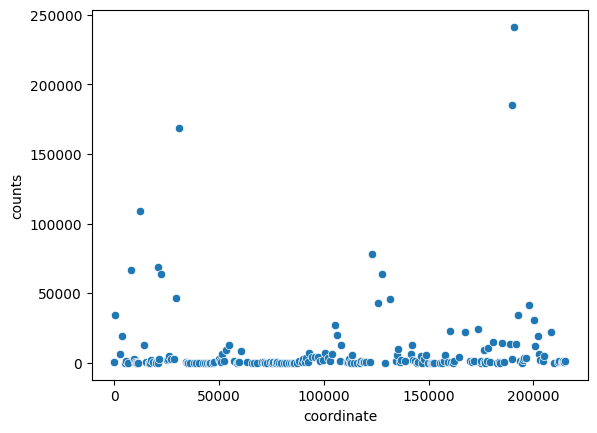

In [81]:
sns.scatterplot(data=counts_df.iloc[:200,:], x='coordinate', y='counts')

Да, видно, что какие-то регионы значительно сильнее покрыты ридами

## 2.3 (1 балл). Проанализируйте значения RPKM для генов из оперона ATP. Укажите геномные координаты оперона, а также то, какие гены в него входят. Есть ли разница между RPKM у различных генов, присутствующих в опероне? Как вы можете объяснить эту разницу с биологической точки зрения? Как вы думаете, можно ли оценить эту разницу при помощи классического RNA-Seq?

In [82]:
annotation['gene'] = annotation.iloc[:, -1].str.split(';Name=').str[1].str.split(';', 1).str[0]

/var/folders/7h/_mrm1yh5299bvqql6k199xb00000gn/T/ipykernel_96706/18704896.py:1: FutureWarning:

In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.



In [83]:
# annotation.drop('ID=NC_000913.3:1..4641652;Dbxref=taxon:511145;Is_circular=true;Name=ANONYMOUS;gbkey=Src;genome=chromosome;mol_type=genomic DNA;strain=K-12;substrain=MG1655')

In [84]:
atp_operon = annotation.loc[annotation['gene'].str.contains('atp')]

In [85]:
atp_operon

NC_000913.3  RefSeq region          1    4641652  .  + ..1  \
8035  NC_000913.3  RefSeq   gene  3915553.0  3915972.0  .  -   .   
8037  NC_000913.3  RefSeq   gene  3915993.0  3917375.0  .  -   .   
8039  NC_000913.3  RefSeq   gene  3917402.0  3918265.0  .  -   .   
8041  NC_000913.3  RefSeq   gene  3918316.0  3919857.0  .  -   .   
8043  NC_000913.3  RefSeq   gene  3919870.0  3920403.0  .  -   .   
8045  NC_000913.3  RefSeq   gene  3920418.0  3920888.0  .  -   .   
8047  NC_000913.3  RefSeq   gene  3920950.0  3921189.0  .  -   .   
8049  NC_000913.3  RefSeq   gene  3921236.0  3922051.0  .  -   .   
8051  NC_000913.3  RefSeq   gene  3922060.0  3922440.0  .  -   .   

     ID=NC_000913.3:1..4641652;Dbxref=taxon:511145;Is_circular=true;Name=ANONYMOUS;gbkey=Src;genome=chromosome;mol_type=genomic DNA;strain=K-12;substrain=MG1655  \
8035  ID=gene-b3731;Dbxref=ASAP:ABE-0012206,ECOCYC:E...                                                                                                            
8037  ID=gene-b3732;Dbxref=ASAP:ABE-0012208,ECOCYC:E...                                                                                                            
8039  ID=gene-b3733;Dbxref=ASAP:ABE-0012211,ECOCYC:E...                                                                                                            
8041  ID=gene-b3734;Dbxref=ASAP:ABE-0012213,ECOCYC:E...                                                                                                            
8043  ID=gene-b3735;Dbxref=ASAP:ABE-0012215,ECOCYC:E...                                                                                                            
8045  ID=gene-b3736;Dbxref=ASAP:ABE-0012217,ECOCYC:E...                                                                                                            
8047  ID=gene-b3737;Dbxref=ASAP:ABE-0012220,ECOCYC:E...                                                                                                            
8049  ID=gene-b3738;Dbxref=ASAP:ABE-0012222,ECOCYC:E...                                                                                                            
8051  ID=gene-b3739;Dbxref=ASAP:ABE-0012224,ECOCYC:E...                                                                                                            

      gene  
8035  atpC  
8037  atpD  
8039  atpG  
8041  atpA  
8043  atpH  
8045  atpF  
8047  atpE  
8049  atpB  
8051  atpI

In [86]:
annotation['gene'][8051]

'atpI'

In [87]:
counts_df[counts_df['coordinate'].between(3915553.0, 3922440.0)] # для генов из атф оперона

coordinate  counts  gene_length              A          TPM  \
3810     3915553   11576          420   27561.904762   283.188934   
3811     3915993   84139         1383   60838.033261   625.089518   
3812     3917402   12618          864   14604.166667   150.052706   
3813     3918316   73134         1542   47428.015564   487.306275   
3814     3919870    9441          534   17679.775281   181.653509   
3815     3920418   12632          471   26819.532909   275.561322   
3816     3920950   71395          240  297479.166667  3056.494415   
3817     3921236   22903          816   28067.401961   288.382741   
3818     3922060     511          381    1341.207349    13.780437   

             RPKM        TPM_2  
3810   466.729242   283.188934  
3811  1030.222309   625.089518  
3812   247.304811   150.052706  
3813   803.139041   487.306275  
3814   299.386715   181.653509  
3815   454.158026   275.561322  
3816  5037.468464  3056.494415  
3817   475.289257   288.382741  
3818    22.711808    13.780437

In [88]:
atp=counts_df[counts_df['coordinate'].between(3915553.0, 3922440.0)] 
atp=atp.set_index(atp_operon['gene'])

In [89]:
atp.sort_values(by='RPKM')

coordinate  counts  gene_length              A          TPM  \
gene                                                                
atpI     3922060     511          381    1341.207349    13.780437   
atpG     3917402   12618          864   14604.166667   150.052706   
atpH     3919870    9441          534   17679.775281   181.653509   
atpF     3920418   12632          471   26819.532909   275.561322   
atpC     3915553   11576          420   27561.904762   283.188934   
atpB     3921236   22903          816   28067.401961   288.382741   
atpA     3918316   73134         1542   47428.015564   487.306275   
atpD     3915993   84139         1383   60838.033261   625.089518   
atpE     3920950   71395          240  297479.166667  3056.494415   

             RPKM        TPM_2  
gene                            
atpI    22.711808    13.780437  
atpG   247.304811   150.052706  
atpH   299.386715   181.653509  
atpF   454.158026   275.561322  
atpC   466.729242   283.188934  
atpB   475.289257   288.382741  
atpA   803.139041   487.306275  
atpD  1030.222309   625.089518  
atpE  5037.468464  3056.494415

Гены из оперона АТФ имеют достаточно вариабельное покрытие. Так, наибольшее покрытие имеет ген atpE, кодирующий ATP synthase subunit с, а также примерно равное - atpD, кодирующий β-subunit и atpA, кодирующий альфа субъединицу. 

С-кольцо образовано несколькими с-субъединицами, поэтому покрытие этого гена может быть пропорционально потребности в белке. То же может быть справедливо и для субъединиц а, б - их, кажется, по три в комплексе. Таким образом, наиболее активно транслируются структурные субъединицы, которых численно требуется больше для формирования комплекса.  
Наименьшее значение RPKM имеют гены, кодирующие субъединицы, которых в комплексе требуется по одной - гамма, дельта.. 

При помощи обычного РНК-сек разницу, наверное, можно оценить, но она будет менее явной: в случае с Рибо-сек мы рассматриваем релально транслируемые гены, тогда как при анализе РНК-секвенирования мы будем в равной степени оценивать важность транскриптов, которые нормально процессируются и деградируются. 